Assignment:4)	Use pima_Indian_Diabetes dataset and perform the following:
a.	Use preprocessing methods to clean the dataset.
b.	Spit the dataset into Train and Test dataset, respectively.
c.	Visualize your training data to know whether the relationship between dependent and independent variable is linear.
d.	Use train dataset to create a decision tree model.
e.	Use test dataset for predictions.
f.	Access the accuracy of your model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df.columns = columns

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.shape

(767, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


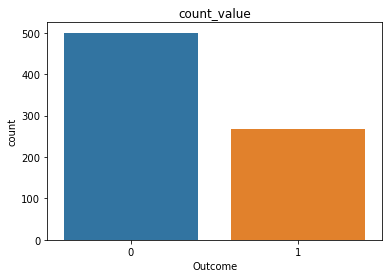

In [8]:
#plot single column by count its value by using count plot
plt.title("count_value")
sns.countplot(df["Outcome"])
plt.show()

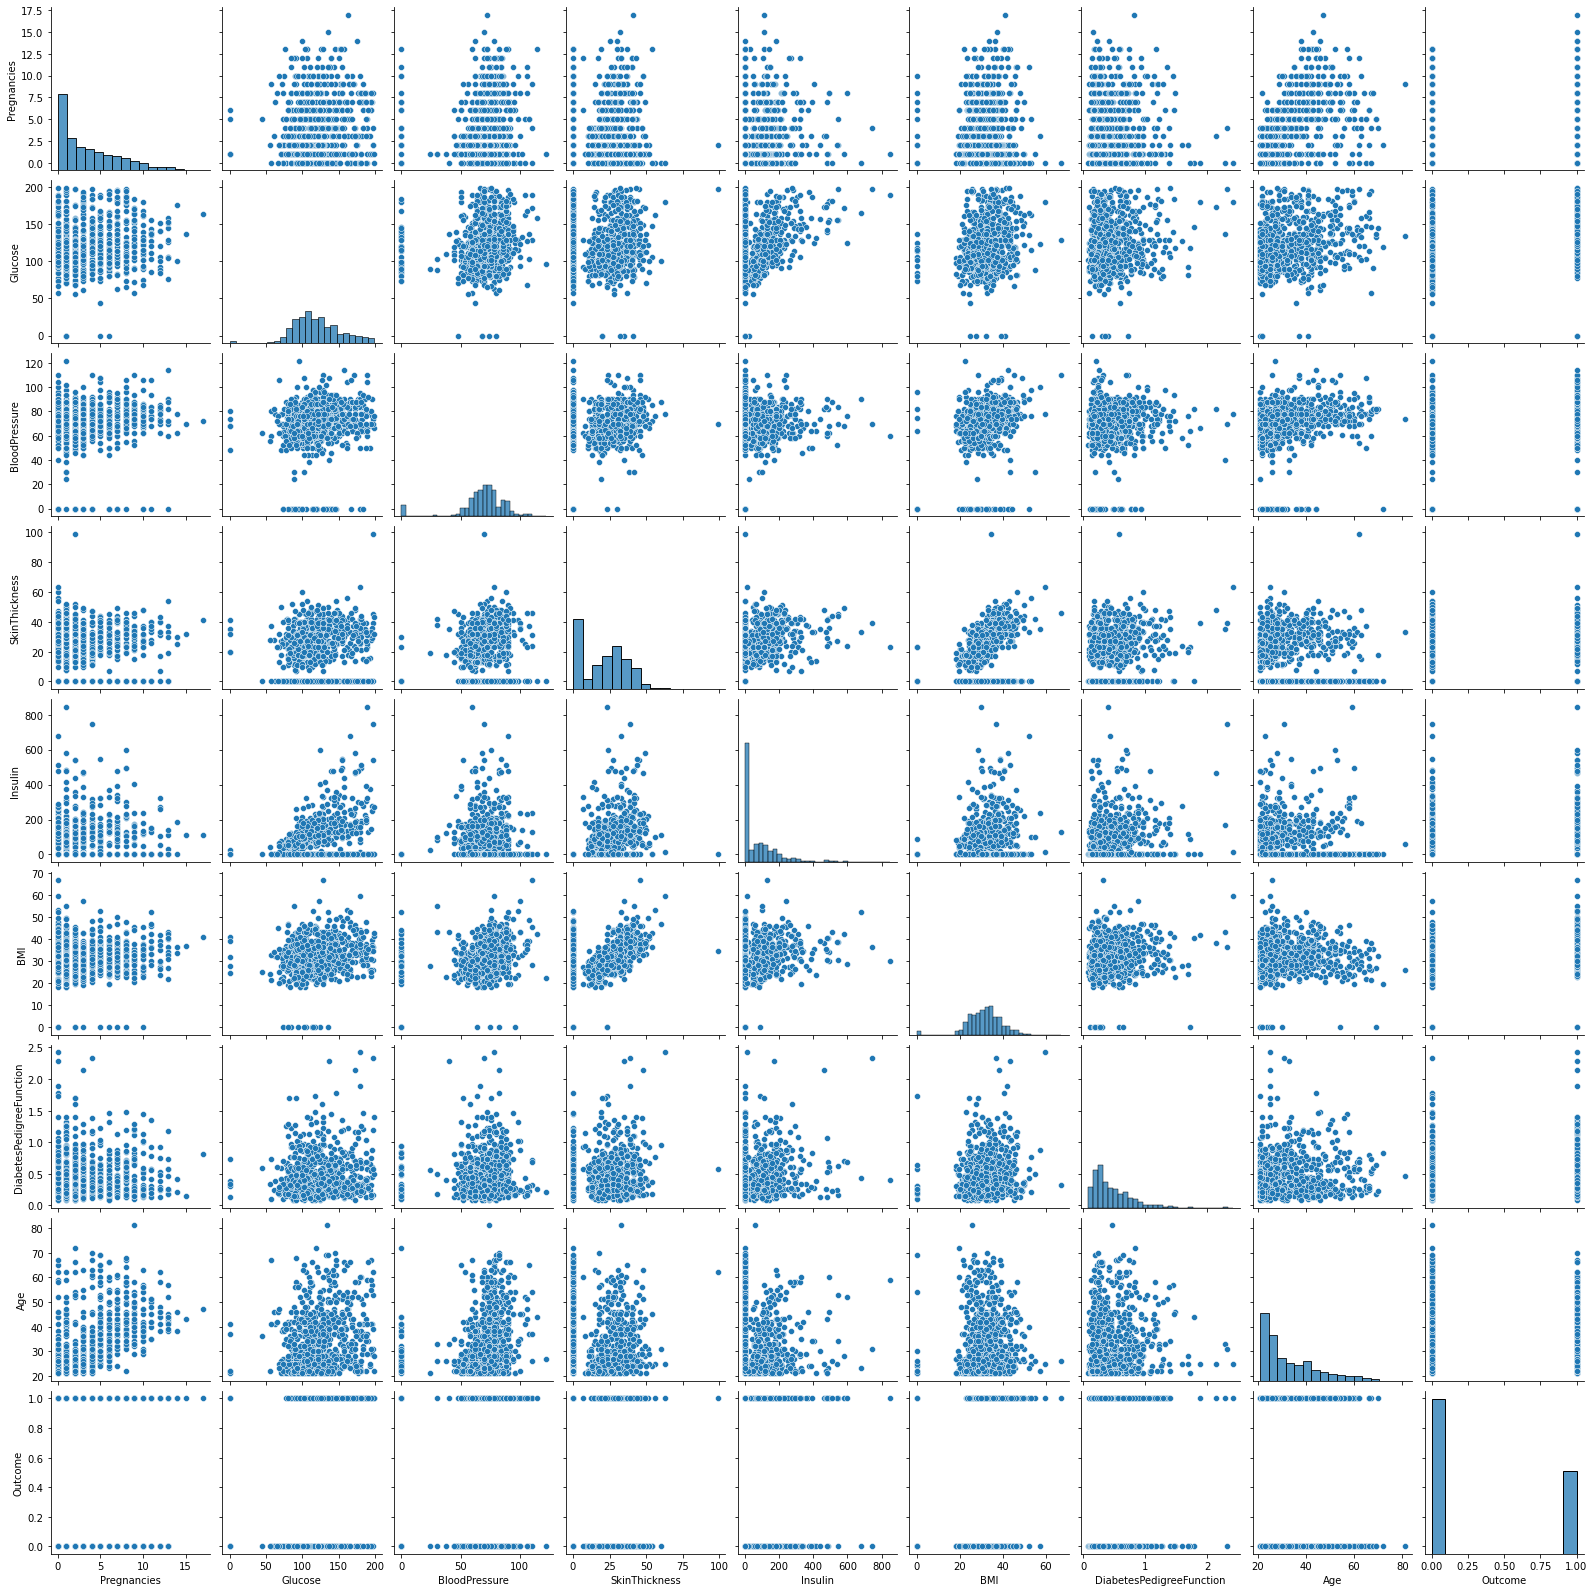

In [9]:
# pair plot
import seaborn as sns
sns.pairplot(df)
plt.show()

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel ='linear' , random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[95 12]
 [26 21]]


75.32467532467533

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [17]:
ag=AdaBoostClassifier()
ag.fit(X_train,y_train)

AdaBoostClassifier()

In [18]:
precdiction_train=ag.predict(X_train)
accuracy_score(y_train,precdiction_train)

0.8548123980424144

In [19]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred_prob = xgb.predict_proba(X_test)

In [20]:
precdiction_train=xgb.predict(X_train)
accuracy_score(y_train,precdiction_train)

1.0

In [21]:
clf=DecisionTreeClassifier(random_state=0,criterion="gini")
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

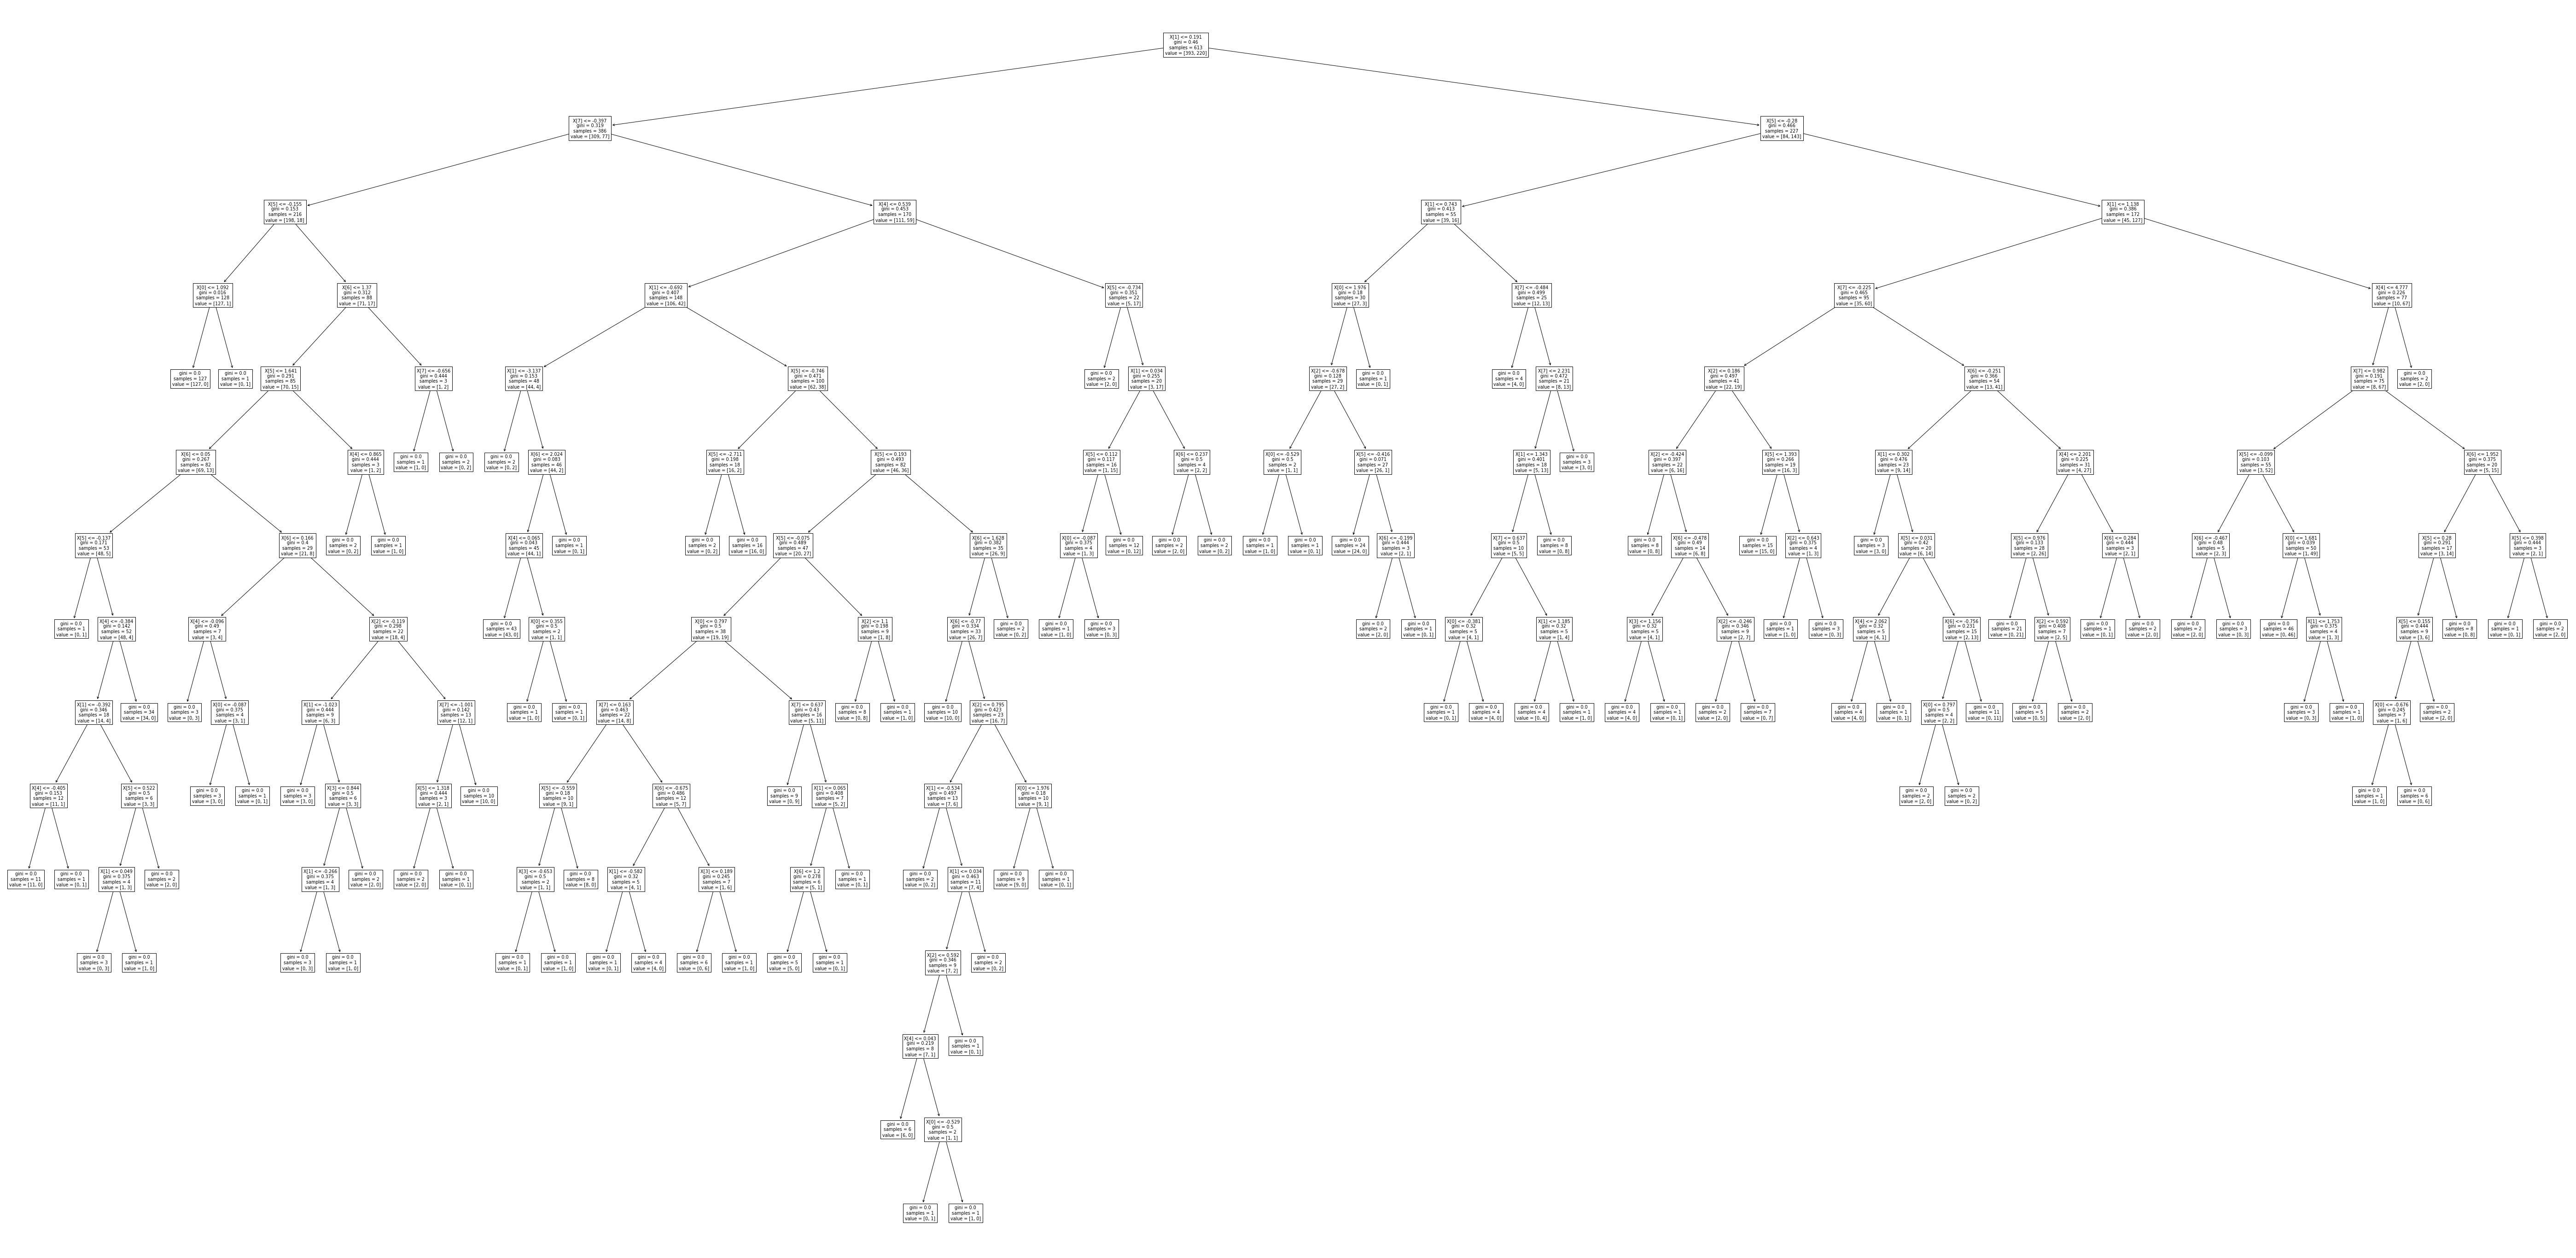

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(clf.fit(X_train, y_train))
plt.show()